In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import lmfit   # Fitting lib
import math
import random 
import matplotlib.pyplot as plt

In [2]:
rr = te.loada("""
     A -> B; k1*A
     B -> C; k2*B
     B -> D; k3*B
      
     A = 50; 
     B = 0;
     C = 0;
     D = 0;
     k1 = 0.15
     k2 = 0.2
     k3 = 0.1
""")

timeToSimulate = 30
nDataPoints = 10

In [3]:
data = rr.simulate (0, timeToSimulate, nDataPoints)
data

       time,      [A],     [B],     [C]
 [[       0,       50,       0,       0],
  [ 3.33333,  30.3265,  13.967, 5.70644],
  [ 6.66667,   18.394, 15.6423, 15.9637],
  [      10,  11.1565, 13.1692, 25.6743],
  [ 13.3333,  6.76677, 9.87776, 33.3555],
  [ 16.6667,  4.10425, 6.96164, 38.9341],
  [      20,  2.48936,  4.7207, 42.7899],
  [ 23.3333,  1.50987, 3.11906, 45.3711],
  [ 26.6667, 0.915786, 2.02315, 47.0611],
  [      30, 0.555453, 1.29453,   48.15]]

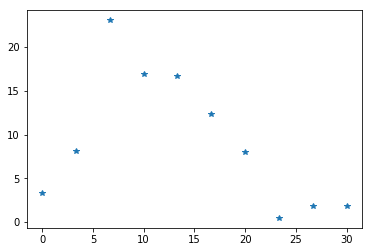

In [4]:
# Create the experimental data


# Create some 'experimental' data 
x_data = data[:, 0]
y_data = data[:,2]

for i in range (nDataPoints):
    y_data[i] = max(y_data[i] + np.random.normal (0, 5), 0) # standard deviation of noise

# Plot it to see what it looks like
plt.plot (x_data, y_data, marker='*', linestyle='None')
plt.show()


# Running a minimization
1. Define parameters present
1. Define python function that calculates residuals given parameter values
1. Construct the minimizer
1. Run the minimizer

In [5]:
# Define the parameters present
parameters = lmfit.Parameters()
parameters.add('k1', value=1, min=0, max=10)
parameters.add('k2', value=1, min=0, max=10)
parameters.add('k3', value=1, min=0, max=10)

In [31]:
# Define a python function that computes residuals from parameter values
def residuals(p):
    rr.reset()  
    pp = p.valuesdict()
    rr.k1 = pp['k1']
    rr.k2 = pp['k2']
    rr.k2 = pp['k3']
    #data = rr.simulate (0, timeToSimulate, nDataPoints, ['B'])
    sim_data = rr.simulate (0, timeToSimulate, nDataPoints, ['A', 'B', 'C'])
    return sum(data[:,1:] - sim_data[:,:]) 


In [7]:
# Create the minimizer
fitter = lmfit.Minimizer(residuals, parameters)

In [8]:
# Run the minimizer and examine the results
result = fitter.minimize (method='leastsq')
print (result.message)

# You can also print
print (result.chisqr)
print (result.params)


Fit succeeded.
123.23549363558008
Parameters([('k1', <Parameter 'k1', value=0.14397936783400234 +/- 0.0247, bounds=[0:10]>), ('k2', <Parameter 'k2', value=0.14500426827539492 +/- 0.0247, bounds=[0:10]>)])


In [15]:
result.params.get('k1').value

0.14397936783400234

In [37]:
def runSim(count, method='leastsq', noise_std=0.5, residuals=residuals):
    # Define the parameters present
    global y_data
    constants = {'k1': [], 'k2': [], 'k3': []}
    for _ in range(count):
        for i in range (nDataPoints):
            y_data[i] = max(data[i, 2] + np.random.normal (0, 5), 0) # standard deviation of noise
        parameters = lmfit.Parameters()
        for constant in constants.keys():
            parameters.add(constant, value=1, min=0, max=10)
        # Create the minimizer
        import pdb; pdb.set_trace()
        fitter = lmfit.Minimizer(residuals, parameters)
        result = fitter.minimize (method=method)
        for constant in constants.keys():
           constants[constant].append(result.params.get(constant).value)
    return {k: [np.mean(v), np.std(v)] for k,v in constants.items()}
        

In [38]:
runSim(10)

> <ipython-input-37-efe9ef1ada10>(13)runSim()
-> fitter = lmfit.Minimizer(residuals, parameters)
(Pdb) c


IndexError: index 2 is out of bounds for axis 1 with size 1

## Exercises
1. Run the fit 5 times and compute the standard deviation of the parameter estimate. How does it compare with the +/- values reported by the minimizer?
1. Add the reaction B -> C; k2\*B. Redo the fit.

In [9]:
import numpy as np
np.std([.169, .109, .139, .147, .162])

0.02097999046710937